In [8]:
import scipy.io 
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import colorsys

In [9]:
def display_palette(colors):
    fig = plt.figure()
    gs = plt.GridSpec(1, len(colors))
    for i, color in enumerate(colors):
        # display color
        ax = fig.add_subplot(gs[0, i])
        ax.imshow(color)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

    fig.tight_layout()
    fig.subplots_adjust(wspace=0., hspace=0.)
    return fig

In [10]:
def convert_rgb_to_hsv(rgb_palette):
    hsv = np.zeros(rgb_palette.shape)
    for i in range(rgb_palette.shape[0]):
        hsv[i, :] = colorsys.rgb_to_hsv(rgb_palette[i, 0],
                                    rgb_palette[i, 1],
                                    rgb_palette[i, 2])
    return hsv

In [20]:
test = scipy.io.loadmat(".\colorCode\data\mturkData.mat")

other = {}
for key in test.keys():
    if key == "data":
        data = test[key]
    elif key[:2] == "__":
        continue
    else:
        other[key] = (test[key][:, 0])

print(data.shape)

df = pd.DataFrame.from_dict(other)

for i in range(data.shape[1]):
    col_prefix = "palette_" + str(i)
    rgb = ["R", "G", "B"]
    for j in range(3):
        colname = col_prefix + "_" + rgb[j]
        df[colname] = (data[:, i, j])
    
for i in range(data.shape[1]):
    col_prefix = "palette_" + str(i)
    hsv = ["H", "S", "V"]
    converted = convert_rgb_to_hsv(data[:, i, :])
    for j in range(3):
        colnameHSV = col_prefix + "_" + hsv[j]
        df[colnameHSV] = (data[:, i, j])

for i in range(3):
    rgb = ["R", "G", "B"]
    colname = "mean_color_" + rgb[i]
    df[colname] = np.mean(data[:, :, i])
    colname = "std_color_" + rgb[i]
    df[colname] = np.std(data[:, :, i])




(10743, 5, 3)


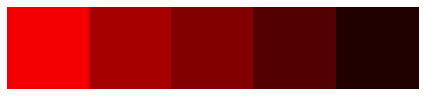

In [21]:
def make_color_array(colors):
    numColors, numComp = colors.shape
    allcolors = []
    for i in range(numColors):
        arr = np.ones((10, 10, numComp))
        arr[:, :, :] = colors[i, :]
        allcolors.append(arr)
    return allcolors

def display_from_df(palette_col):
    palette = make_color_array(palette_col)
    display_palette(palette)


display_from_df(data[5, :, :])

In [22]:
color_rating_data = df.copy()
color_rating_data.drop(["ids", "names", "targets"], inplace=True, axis=1)

display(color_rating_data[:5])


,userNormalizedTargets,palette_0_R,palette_0_G,palette_0_B,palette_1_R,palette_1_G,palette_1_B,palette_2_R,palette_2_G,palette_2_B,...,palette_3_V,palette_4_H,palette_4_S,palette_4_V,mean_color_R,std_color_R,mean_color_G,std_color_G,mean_color_B,std_color_B
0,0.218844,0.345098,0.549020,0.549020,0.286275,0.419608,0.450980,0.749020,0.819608,0.850980,...,0.749020,0.450980,0.211765,0.254902,0.558129,0.309645,0.488512,0.295314,0.388158,0.280074
1,0.296755,0.835294,1.000000,0.870588,0.105882,0.800000,0.443137,0.000000,0.619608,0.458824,...,0.411765,0.152941,0.588235,0.749020,0.558129,0.309645,0.488512,0.295314,0.388158,0.280074
2,0.254885,0.956863,0.866667,0.694118,0.364706,0.443137,0.337255,0.325490,0.329412,0.274510,...,0.129412,0.568627,0.266667,0.062745,0.558129,0.309645,0.488512,0.295314,0.388158,0.280074
3,-0.355154,0.800000,0.752941,0.450980,1.000000,0.980392,0.411765,0.890196,0.662745,1.000000,...,0.658824,0.600000,0.133333,0.415686,0.558129,0.309645,0.488512,0.295314,0.388158,0.280074
4,-0.444863,0.517647,0.643137,0.062745,0.772549,0.576471,0.117647,0.380392,0.074510,0.074510,...,0.156863,0.862745,0.509804,0.176471,0.558129,0.309645,0.488512,0.295314,0.388158,0.280074


In [24]:
from sklearn.model_selection import train_test_split

color_rating_data = df.copy()
color_rating_data.drop(["ids", "names", "targets"], inplace=True, axis=1)
train_set, test_set = train_test_split(color_rating_data, test_size=0.2, random_state=42)
train_labels = train_set.pop("userNormalizedTargets")


In [25]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Treinar regressão Lasso

In [26]:
lasso_reg = Lasso()
                        
scores = cross_val_score(lasso_reg, train_set, train_labels,
                         scoring="neg_mean_squared_error", cv=10)

mse_scores = np.sqrt(-scores)

In [27]:
print(mse_scores)
print(mse_scores.mean())
print(mse_scores.std())

[0.32890109 0.33914179 0.33440657 0.33394674 0.32551856 0.33989691
 0.33461189 0.32894982 0.34039785 0.32468099]
0.3330452212994391
0.005512281539406434


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'alpha':[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]},
              {'alpha':[1e-7, 1e-6], 'max_iter':[5000]}]

lasso_reg = Lasso()
                        
grid_search = GridSearchCV(lasso_reg, param_grid, cv=10,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(train_set, train_labels)

C:\Users\fcoel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.88725213248352, tolerance: 0.08603351111556759
  model = cd_fast.enet_coordinate_descent(
C:\Users\fcoel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.92725713500954, tolerance: 0.08544260014905385
  model = cd_fast.enet_coordinate_descent(
C:\Users\fcoel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.88800944932802, tolerance: 0.08571756522696358
  model = cd_fast.enet_coordinate_descent(
C:\Users\fcoel\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergenc

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1]},
                         {'alpha': [1e-07, 1e-06], 'max_iter': [5000]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
grid_search.best_params_

{'alpha': 1e-06}

In [37]:
gs_results = grid_search.cv_results_
for mean_score, params in zip(gs_results["mean_test_score"], gs_results["params"]):
    print(np.sqrt(-mean_score), params)

0.30646183864438925 {'alpha': 1e-07}
0.30646175886672317 {'alpha': 1e-06}
0.3064619137190598 {'alpha': 1e-05}
0.3064659594036232 {'alpha': 0.0001}
0.30656314489984526 {'alpha': 0.001}
0.3135449562040256 {'alpha': 0.01}
0.3330908354760936 {'alpha': 0.1}
0.3330908354760936 {'alpha': 1}


In [40]:
train_labels.describe()

count    8594.000000
mean       -0.000185
std         0.333082
min        -1.565246
25%        -0.201830
50%         0.018030
75%         0.224033
max         1.067736
Name: userNormalizedTargets, dtype: float64